In [1]:
import pickle

Now upload files manually via sidebar

## load data

In [ ]:
with open("/content/digits_adjList.pkl", "rb") as f:
  digits_adjList = pickle.load(f)

In [ ]:
with open("/content/numwords_adjList.pkl", "rb") as f:
  numwords_adjList = pickle.load(f)

In [ ]:
with open("/content/months_adjList.pkl", "rb") as f:
  months_adjList = pickle.load(f)

# Plot

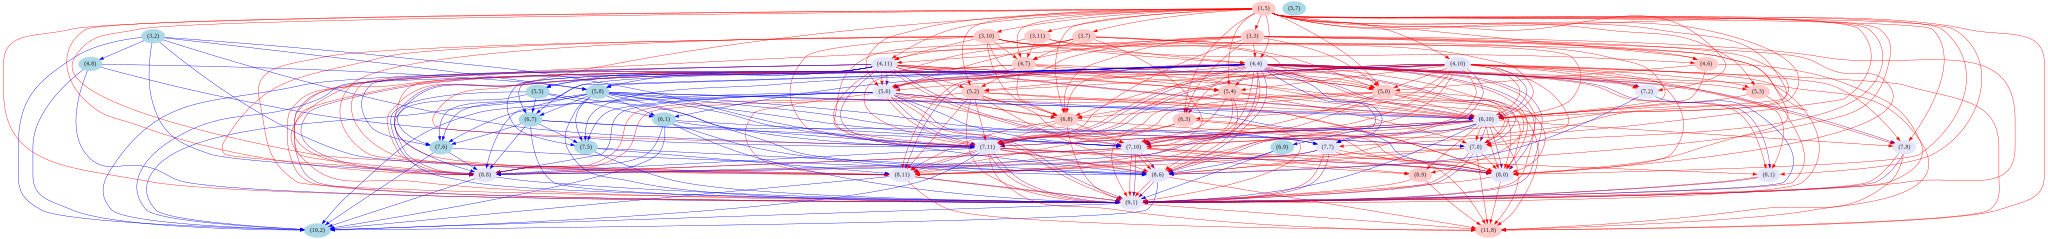

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from graphviz import Digraph, Source
from IPython.display import display
from google.colab import files

def plot_graph_adjacency(head_adjList_1, head_adjList_2, head_adjList_3, filename="circuit_graph"):
    dot = Digraph()

    # concat all keys from lists into one list
    # all_keys = list(head_adjList_1.keys()) + list(head_adjList_2.keys()) + list(head_adjList_3.keys())
    # setX = all_keys

    # greater_than = [(0, 1), (0, 3), (0, 5), (5, 5), (6, 1), (6, 9), (7, 10), (8, 11), (9,1)]
    # set3 = set(greater_than)

    # determine set overlap
    set1 = set(list(head_adjList_1.keys()))
    set2 = set(list(head_adjList_2.keys()))
    set3 = set(list(head_adjList_3.keys()))
    # setX = set1.union(set2, set3)
    setX = set1.union(set2)

    color_dict = {}
    for end_node in setX:
    # for member in setX:
        in_set1 = end_node in set1
        in_set2 = end_node in set2
        # in_set1 = member in set1
        # in_set2 = member in set2
        # in_set3 = member in set3

        # if in_set1 and not in_set2 and not in_set3:
        if in_set1 and not in_set2:
            # color_dict[member] = "#ffcccb" #light red
            dot.node(str(end_node), color="#ffcccb", style='filled')
        # elif not in_set1 and in_set2 and not in_set3:
        elif not in_set1 and in_set2:
            # color_dict[member] = "#ADD8E6" #light blue
            dot.node(str(end_node), color="#ADD8E6", style='filled')
        # elif not in_set1 and not in_set2 and in_set3:
        #     color_dict[member] = "#FDDC5C" #light gold
        # elif in_set1 and in_set2 and not in_set3:
        elif in_set1 and in_set2:
            # color_dict[member] = "#E6E6FA" #light purple
            dot.node(str(end_node), color="#E6E6FA", style='filled')
        # elif not in_set1 and in_set2 and in_set3:
        #     color_dict[member] = "#90EE90" #light green
        # elif in_set1 and not in_set2 and in_set3:
        #     color_dict[member] = "#FFD580" #light orange
        # elif in_set1 and in_set2 and in_set3:
        #     color_dict[member] = "white"

    # for end_node in setX:
    #     endNodeColor = color_dict[end_node]
    #     if endNodeColor != 'white':
    #         dot.node(str(end_node), color=endNodeColor, style='filled')
    #     else:
    #         dot.node(str(end_node))

    edges_so_far = []
    for end_node, start_nodes_list in head_adjList_1.items():
        for start_node in start_nodes_list:
            # if (start_node, end_node) not in edges_so_far:
            dot.edge(str(start_node), str(end_node), color = 'red') #light red #ffcccb
            edges_so_far.append((start_node, end_node))
    for end_node, start_nodes_list in head_adjList_2.items():
        for start_node in start_nodes_list:
            if (start_node, end_node) not in edges_so_far:
                dot.edge(str(start_node), str(end_node), color = 'blue') #light blue #ADD8E6
                edges_so_far.append((start_node, end_node))
            else:
                dot.edge(str(start_node), str(end_node), color = 'purple')
    # for end_node, start_nodes_list in head_adjList_3.items():
    #     if (start_node, end_node) not in edges_so_far:
    #         dot.edge(str(start_node), str(end_node), color = '#FDDC5C') #light gold
    #         edges_so_far.append((start_node, end_node))

    # Display the graph in Colab
    display(Source(dot.source))

    # Save the graph to a file
    # dot.format = 'pdf'  # You can change this to 'pdf', 'svg', etc. based on your needs
    dot.format = 'png'  # You can change this to 'pdf', 'svg', etc. based on your needs
    dot.render(filename)
    # files.download(filename + ".pdf")
    files.download(filename + ".png")

plot_graph_adjacency(digits_adjList, numwords_adjList, months_adjList, filename="circuit_graph")

# incr E thres to reduce E

## load

In [ ]:
import torch, pickle

In [ ]:
def edges_within_threshold(results: torch.Tensor, threshold: float = 0.05) -> list:
    """Return the (layer, head) pairs where the absolute values in results are within a threshold."""

    # Take the absolute value of the results tensor
    abs_tensor = torch.abs(results)

    # Find indices where values exceed the threshold
    indices = (abs_tensor > threshold).nonzero().squeeze()

    # Convert indices to (layer, head) pairs based on dimensions
    if indices.dim() == 1:  # If we got a single-dimensional tensor, it means we only have one match
        layers = [indices[0].item()]
        heads = [indices[1].item()]
    else:
        layers = indices[:, 0].tolist()
        heads = indices[:, 1].tolist()

    return list(zip(layers, heads))

In [ ]:
def thres_at_perc(results_dict, perc):
    # the top perc%
    all_values = []
    for result_tensor in results_dict.values():
        all_values.extend(result_tensor.cpu().numpy().flatten())
    sorted_values = sorted(all_values)

    ind_perc = (100 - perc)/100

    # Calculate the index for the top 10%
    index_10_percent = int(ind_perc * len(sorted_values))

    # Retrieve the value at that index
    value_at_10_percent = sorted_values[index_10_percent]
    return value_at_10_percent

In [ ]:
with open("/content/digits_results_dict.pkl", "rb") as f:
  digits_results_dict = pickle.load(f)

In [ ]:
with open("/content/numwords_results_dict.pkl", "rb") as f:
  numwords_results_dict = pickle.load(f)

## top5

In [ ]:
topperc = 5

In [ ]:
%%capture
Ethres = thres_at_perc(digits_results_dict, topperc)
circuit = [(1, 5), (3, 3), (3, 7), (3, 10), (3, 11), (4, 4), (4, 6), (4, 7), (4, 10), (4, 11), (5, 0), (5, 2), (5, 3), (5, 4), (5, 6), (6, 3), (6, 8), (6, 10), (7, 0), (7, 2), (7, 7), (7, 8), (7, 10), (7, 11), (8, 0), (8, 1), (8, 6), (8, 8), (8, 9), (8, 11), (9, 1), (11, 8)]

digits_adjList = {}
for head in circuit:
    result = digits_results_dict[head]
    digits_adjList[head] = edges_within_threshold(result, Ethres)

In [ ]:
# only keep nodes that were part of original circuit
all_keys = set(digits_adjList.keys())
# Iterate through the dictionary and filter the list values
for key, value in digits_adjList.items():
    digits_adjList[key] = [item for item in value if item in all_keys]

In [ ]:
%%capture
Ethres = thres_at_perc(numwords_results_dict, topperc)
circuit = [(3, 2), (4, 4), (4, 8), (4, 10), (4, 11), (5, 5), (5, 6), (5, 7), (5, 8), (6, 1), (6, 7), (6, 9), (6, 10), (7, 0), (7, 2), (7, 5), (7, 6), (7, 7), (7, 8), (7, 10), (7, 11), (8, 0), (8, 1), (8, 6), (8, 8), (8, 11), (9, 1), (10, 2)]

numwords_adjList = {}
for head in circuit:
    result = numwords_results_dict[head]
    numwords_adjList[head] = edges_within_threshold(result, Ethres)

In [ ]:
# only keep nodes that were part of original circuit
all_keys = set(numwords_adjList.keys())
# Iterate through the dictionary and filter the list values
for key, value in numwords_adjList.items():
    numwords_adjList[key] = [item for item in value if item in all_keys]

In [ ]:
from graphviz import Digraph, Source
from IPython.display import display
from google.colab import files

def plot_graph_adjacency(head_adjList_1, head_adjList_2, head_adjList_3=None, filename="circuit_graph"):
    dot = Digraph()

    # concat all keys from lists into one list
    # all_keys = list(head_adjList_1.keys()) + list(head_adjList_2.keys()) + list(head_adjList_3.keys())
    # setX = all_keys

    # greater_than = [(0, 1), (0, 3), (0, 5), (5, 5), (6, 1), (6, 9), (7, 10), (8, 11), (9,1)]
    # set3 = set(greater_than)

    # determine set overlap
    set1 = set(list(head_adjList_1.keys()))
    set2 = set(list(head_adjList_2.keys()))
    # set3 = set(list(head_adjList_3.keys()))
    # setX = set1.union(set2, set3)
    setX = set1.union(set2)

    color_dict = {}
    for end_node in setX:
    # for member in setX:
        in_set1 = end_node in set1
        in_set2 = end_node in set2
        # in_set1 = member in set1
        # in_set2 = member in set2
        # in_set3 = member in set3
        if end_node == (4, 6):
            print(end_node)
            print(in_set1)
            print(in_set2)

        # if in_set1 and not in_set2 and not in_set3:
        if in_set1 and not in_set2:
            # color_dict[member] = "#ffcccb" #light red
            dot.node(str(end_node), color="#ffcccb", style='filled')
        # elif not in_set1 and in_set2 and not in_set3:
        elif not in_set1 and in_set2:
            # color_dict[member] = "#ADD8E6" #light blue
            dot.node(str(end_node), color="#ADD8E6", style='filled')
        # elif not in_set1 and not in_set2 and in_set3:
        #     color_dict[member] = "#FDDC5C" #light gold
        # elif in_set1 and in_set2 and not in_set3:
        elif in_set1 and in_set2:
            # color_dict[member] = "#E6E6FA" #light purple
            dot.node(str(end_node), color="#E6E6FA", style='filled')
        # elif not in_set1 and in_set2 and in_set3:
        #     color_dict[member] = "#90EE90" #light green
        # elif in_set1 and not in_set2 and in_set3:
        #     color_dict[member] = "#FFD580" #light orange
        # elif in_set1 and in_set2 and in_set3:
        #     color_dict[member] = "white"

    # for end_node in setX:
    #     endNodeColor = color_dict[end_node]
    #     if endNodeColor != 'white':
    #         dot.node(str(end_node), color=endNodeColor, style='filled')
    #     else:
    #         dot.node(str(end_node))

    edges_so_far = []
    for end_node, start_nodes_list in head_adjList_1.items():
        for start_node in start_nodes_list:
            # if (start_node, end_node) not in edges_so_far:
            dot.edge(str(start_node), str(end_node), color = 'red') #light red #ffcccb
            edges_so_far.append((start_node, end_node))
    for end_node, start_nodes_list in head_adjList_2.items():
        for start_node in start_nodes_list:
            if (start_node, end_node) not in edges_so_far:
                dot.edge(str(start_node), str(end_node), color = 'blue') #light blue #ADD8E6
                edges_so_far.append((start_node, end_node))
            else:
                dot.edge(str(start_node), str(end_node), color = 'purple', penwidth='4.0')
    # for end_node, start_nodes_list in head_adjList_3.items():
    #     if (start_node, end_node) not in edges_so_far:
    #         dot.edge(str(start_node), str(end_node), color = '#FDDC5C') #light gold
    #         edges_so_far.append((start_node, end_node))

    # Display the graph in Colab
    display(Source(dot.source))

    # Save the graph to a file
    # dot.format = 'pdf'  # You can change this to 'pdf', 'svg', etc. based on your needs
    dot.format = 'pdf'  # You can change this to 'pdf', 'svg', etc. based on your needs
    dot.render(filename)
    # files.download(filename + ".pdf")
    files.download(filename + ".pdf")

(4, 6)
True
False


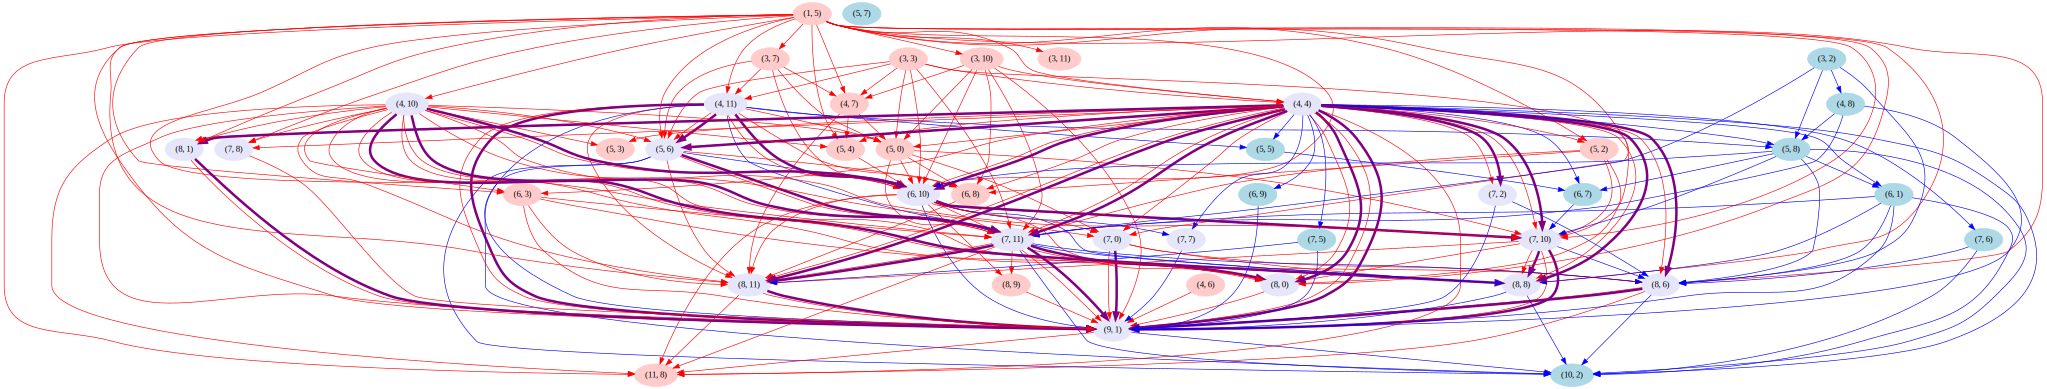

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plot_graph_adjacency(digits_adjList, numwords_adjList, None, filename="circuit_graph_top5")

### rmv a few nodes

In [ ]:
digits_adjList_copy = digits_adjList.copy()
del digits_adjList_copy[(11, 8)]
# del digits_adjList_copy[(4, 6)]

numwords_adjList_copy = numwords_adjList.copy()
# del numwords_adjList_copy[(10, 2)]
del numwords_adjList_copy[(5, 7)]

(4, 6)
True
False


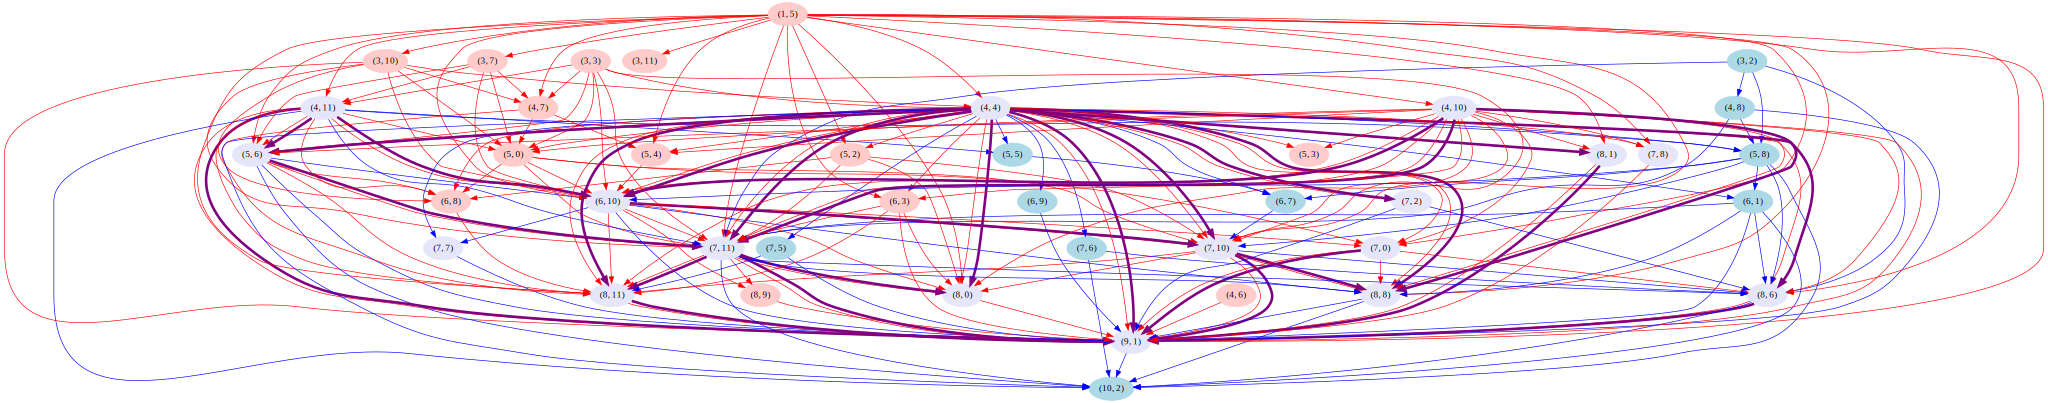

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plot_graph_adjacency(digits_adjList_copy, numwords_adjList_copy, None, filename="circuit_graph_top5")

## top3

In [ ]:
topperc = 3

In [ ]:
%%capture
Ethres = thres_at_perc(digits_results_dict, topperc)
circuit = [(1, 5), (3, 3), (3, 7), (3, 10), (3, 11), (4, 4), (4, 6), (4, 7), (4, 10), (4, 11), (5, 0), (5, 2), (5, 3), (5, 4), (5, 6), (6, 3), (6, 8), (6, 10), (7, 0), (7, 2), (7, 7), (7, 8), (7, 10), (7, 11), (8, 0), (8, 1), (8, 6), (8, 8), (8, 9), (8, 11), (9, 1), (11, 8)]

digits_adjList = {}
for head in circuit:
    result = digits_results_dict[head]
    digits_adjList[head] = edges_within_threshold(result, Ethres)

In [ ]:
# only keep nodes that were part of original circuit
all_keys = set(digits_adjList.keys())
# Iterate through the dictionary and filter the list values
for key, value in digits_adjList.items():
    digits_adjList[key] = [item for item in value if item in all_keys]

In [ ]:
%%capture
Ethres = thres_at_perc(numwords_results_dict, topperc)
circuit = [(3, 2), (4, 4), (4, 8), (4, 10), (4, 11), (5, 5), (5, 6), (5, 7), (5, 8), (6, 1), (6, 7), (6, 9), (6, 10), (7, 0), (7, 2), (7, 5), (7, 6), (7, 7), (7, 8), (7, 10), (7, 11), (8, 0), (8, 1), (8, 6), (8, 8), (8, 11), (9, 1), (10, 2)]

numwords_adjList = {}
for head in circuit:
    result = numwords_results_dict[head]
    numwords_adjList[head] = edges_within_threshold(result, Ethres)

In [ ]:
# only keep nodes that were part of original circuit
all_keys = set(numwords_adjList.keys())
# Iterate through the dictionary and filter the list values
for key, value in numwords_adjList.items():
    numwords_adjList[key] = [item for item in value if item in all_keys]

In [ ]:
from graphviz import Digraph, Source
from IPython.display import display
from google.colab import files

def plot_graph_adjacency(head_adjList_1, head_adjList_2, head_adjList_3=None, filename="circuit_graph"):
    dot = Digraph()

    # concat all keys from lists into one list
    # all_keys = list(head_adjList_1.keys()) + list(head_adjList_2.keys()) + list(head_adjList_3.keys())
    # setX = all_keys

    # greater_than = [(0, 1), (0, 3), (0, 5), (5, 5), (6, 1), (6, 9), (7, 10), (8, 11), (9,1)]
    # set3 = set(greater_than)

    # determine set overlap
    set1 = set(list(head_adjList_1.keys()))
    set2 = set(list(head_adjList_2.keys()))
    # set3 = set(list(head_adjList_3.keys()))
    # setX = set1.union(set2, set3)
    setX = set1.union(set2)

    color_dict = {}
    for end_node in setX:
    # for member in setX:
        in_set1 = end_node in set1
        in_set2 = end_node in set2
        # in_set1 = member in set1
        # in_set2 = member in set2
        # in_set3 = member in set3

        # if end_node == (4, 6):
        #     print(end_node)
        #     print(in_set1)
        #     print(in_set2)

        # if in_set1 and not in_set2 and not in_set3:
        if in_set1 and not in_set2:
            # color_dict[member] = "#ffcccb" #light red
            dot.node(str(end_node), color="#ffcccb", style='filled')
        # elif not in_set1 and in_set2 and not in_set3:
        elif not in_set1 and in_set2:
            # color_dict[member] = "#ADD8E6" #light blue
            dot.node(str(end_node), color="#ADD8E6", style='filled')
        # elif not in_set1 and not in_set2 and in_set3:
        #     color_dict[member] = "#FDDC5C" #light gold
        # elif in_set1 and in_set2 and not in_set3:
        elif in_set1 and in_set2:
            # color_dict[member] = "#E6E6FA" #light purple
            dot.node(str(end_node), color="#E6E6FA", style='filled')
        # elif not in_set1 and in_set2 and in_set3:
        #     color_dict[member] = "#90EE90" #light green
        # elif in_set1 and not in_set2 and in_set3:
        #     color_dict[member] = "#FFD580" #light orange
        # elif in_set1 and in_set2 and in_set3:
        #     color_dict[member] = "white"

    # for end_node in setX:
    #     endNodeColor = color_dict[end_node]
    #     if endNodeColor != 'white':
    #         dot.node(str(end_node), color=endNodeColor, style='filled')
    #     else:
    #         dot.node(str(end_node))

    edges_so_far = []
    for end_node, start_nodes_list in head_adjList_1.items():
        for start_node in start_nodes_list:
            # if (start_node, end_node) not in edges_so_far:
            dot.edge(str(start_node), str(end_node), color = 'red') #light red #ffcccb
            edges_so_far.append((start_node, end_node))
    for end_node, start_nodes_list in head_adjList_2.items():
        for start_node in start_nodes_list:
            if (start_node, end_node) not in edges_so_far:
                dot.edge(str(start_node), str(end_node), color = 'blue') #light blue #ADD8E6
                edges_so_far.append((start_node, end_node))
            else:
                dot.edge(str(start_node), str(end_node), color = 'purple', penwidth='4.0')
    # for end_node, start_nodes_list in head_adjList_3.items():
    #     if (start_node, end_node) not in edges_so_far:
    #         dot.edge(str(start_node), str(end_node), color = '#FDDC5C') #light gold
    #         edges_so_far.append((start_node, end_node))

    # Display the graph in Colab
    display(Source(dot.source))

    # Save the graph to a file
    # dot.format = 'pdf'  # You can change this to 'pdf', 'svg', etc. based on your needs
    dot.format = 'pdf'  # You can change this to 'pdf', 'svg', etc. based on your needs
    dot.render(filename)
    # files.download(filename + ".pdf")
    files.download(filename + ".pdf")

In [ ]:
# plot_graph_adjacency(digits_adjList, numwords_adjList, None, filename="circuit_graph_top5")

### rmv a few nodes

In [ ]:
digits_adjList_copy = digits_adjList.copy()
del digits_adjList_copy[(11, 8)]
del digits_adjList_copy[(4, 6)]
del digits_adjList_copy[(8, 9)]

numwords_adjList_copy = numwords_adjList.copy()
# del numwords_adjList_copy[(10, 2)]
del numwords_adjList_copy[(5, 7)]
del numwords_adjList_copy[(6, 9)]

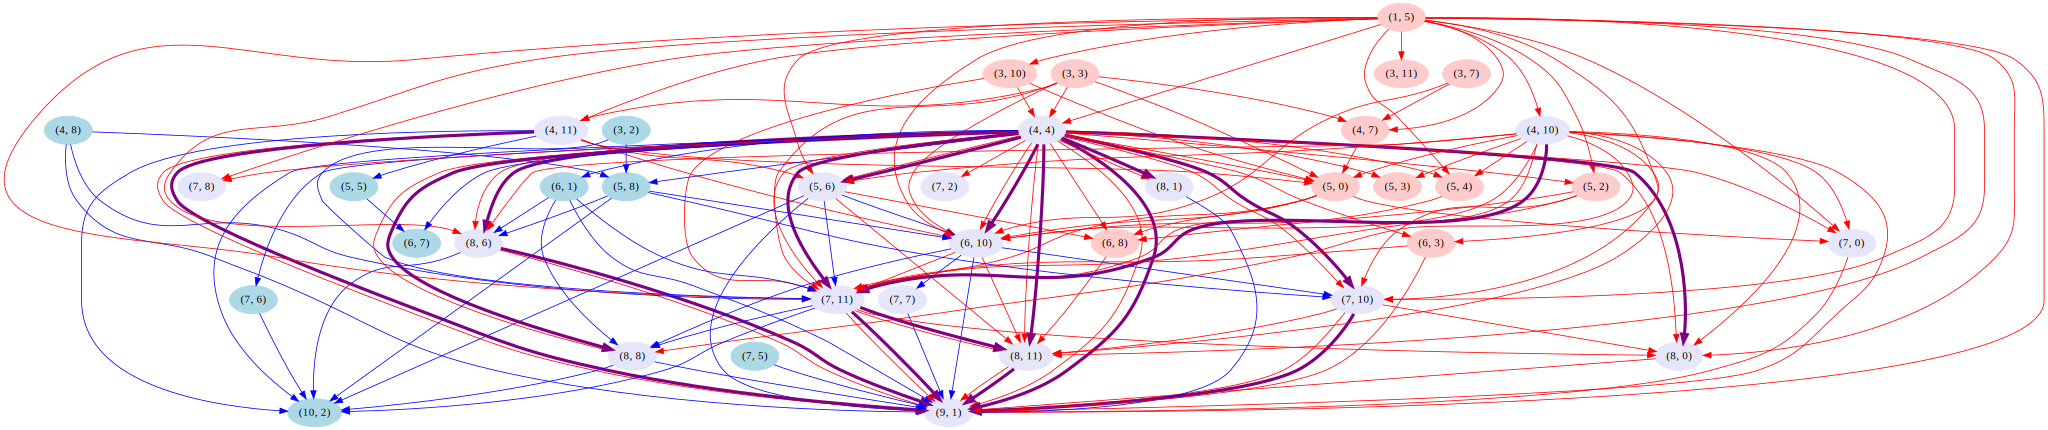

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plot_graph_adjacency(digits_adjList_copy, numwords_adjList_copy, None, filename="circuit_graph_top"+str(topperc))

# bf 97n

## load

In [ ]:
with open("/content/digits_adjList.pkl", "rb") as f:
  digits_adjList = pickle.load(f)

In [ ]:
with open("/content/numwords_adjList.pkl", "rb") as f:
  numwords_adjList = pickle.load(f)

## rmv a few nodes

In [ ]:
topperc=3

In [ ]:
from graphviz import Digraph, Source
from IPython.display import display
from google.colab import files

def plot_graph_adjacency(head_adjList_1, head_adjList_2, head_adjList_3=None, filename="circuit_graph"):
    dot = Digraph()

    # concat all keys from lists into one list
    # all_keys = list(head_adjList_1.keys()) + list(head_adjList_2.keys()) + list(head_adjList_3.keys())
    # setX = all_keys

    # greater_than = [(0, 1), (0, 3), (0, 5), (5, 5), (6, 1), (6, 9), (7, 10), (8, 11), (9,1)]
    # set3 = set(greater_than)

    # determine set overlap
    set1 = set(list(head_adjList_1.keys()))
    set2 = set(list(head_adjList_2.keys()))
    # set3 = set(list(head_adjList_3.keys()))
    # setX = set1.union(set2, set3)
    setX = set1.union(set2)

    color_dict = {}
    for end_node in setX:
    # for member in setX:
        in_set1 = end_node in set1
        in_set2 = end_node in set2
        # in_set1 = member in set1
        # in_set2 = member in set2
        # in_set3 = member in set3

        # if end_node == (4, 6):
        #     print(end_node)
        #     print(in_set1)
        #     print(in_set2)

        # if in_set1 and not in_set2 and not in_set3:
        if in_set1 and not in_set2:
            # color_dict[member] = "#ffcccb" #light red
            dot.node(str(end_node), color="#ffcccb", style='filled')
        # elif not in_set1 and in_set2 and not in_set3:
        elif not in_set1 and in_set2:
            # color_dict[member] = "#ADD8E6" #light blue
            dot.node(str(end_node), color="#ADD8E6", style='filled')
        # elif not in_set1 and not in_set2 and in_set3:
        #     color_dict[member] = "#FDDC5C" #light gold
        # elif in_set1 and in_set2 and not in_set3:
        elif in_set1 and in_set2:
            # color_dict[member] = "#E6E6FA" #light purple
            dot.node(str(end_node), color="#E6E6FA", style='filled')
        # elif not in_set1 and in_set2 and in_set3:
        #     color_dict[member] = "#90EE90" #light green
        # elif in_set1 and not in_set2 and in_set3:
        #     color_dict[member] = "#FFD580" #light orange
        # elif in_set1 and in_set2 and in_set3:
        #     color_dict[member] = "white"

    # for end_node in setX:
    #     endNodeColor = color_dict[end_node]
    #     if endNodeColor != 'white':
    #         dot.node(str(end_node), color=endNodeColor, style='filled')
    #     else:
    #         dot.node(str(end_node))

    edges_so_far = []
    for end_node, start_nodes_list in head_adjList_1.items():
        for start_node in start_nodes_list:
            # if (start_node, end_node) not in edges_so_far:
            dot.edge(str(start_node), str(end_node), color = 'red') #light red #ffcccb
            edges_so_far.append((start_node, end_node))
    for end_node, start_nodes_list in head_adjList_2.items():
        for start_node in start_nodes_list:
            if (start_node, end_node) not in edges_so_far:
                dot.edge(str(start_node), str(end_node), color = 'blue') #light blue #ADD8E6
                edges_so_far.append((start_node, end_node))
            else:
                dot.edge(str(start_node), str(end_node), color = 'purple', penwidth='4.0')
    # for end_node, start_nodes_list in head_adjList_3.items():
    #     if (start_node, end_node) not in edges_so_far:
    #         dot.edge(str(start_node), str(end_node), color = '#FDDC5C') #light gold
    #         edges_so_far.append((start_node, end_node))

    # Display the graph in Colab
    display(Source(dot.source))

    # Save the graph to a file
    # dot.format = 'pdf'  # You can change this to 'pdf', 'svg', etc. based on your needs
    dot.format = 'pdf'  # You can change this to 'pdf', 'svg', etc. based on your needs
    dot.render(filename)
    # files.download(filename + ".pdf")
    files.download(filename + ".pdf")

In [ ]:
digits_adjList_copy = digits_adjList.copy()
del digits_adjList_copy[(11, 10)]
del digits_adjList_copy[(0, 8)]
del digits_adjList_copy[(0, 3)]
del digits_adjList_copy[(2, 4)]
del digits_adjList_copy[(3, 11)]
del digits_adjList_copy[(2, 9)]

numwords_adjList_copy = numwords_adjList.copy()
del numwords_adjList_copy[(11, 8)]
del numwords_adjList_copy[(6, 9)]

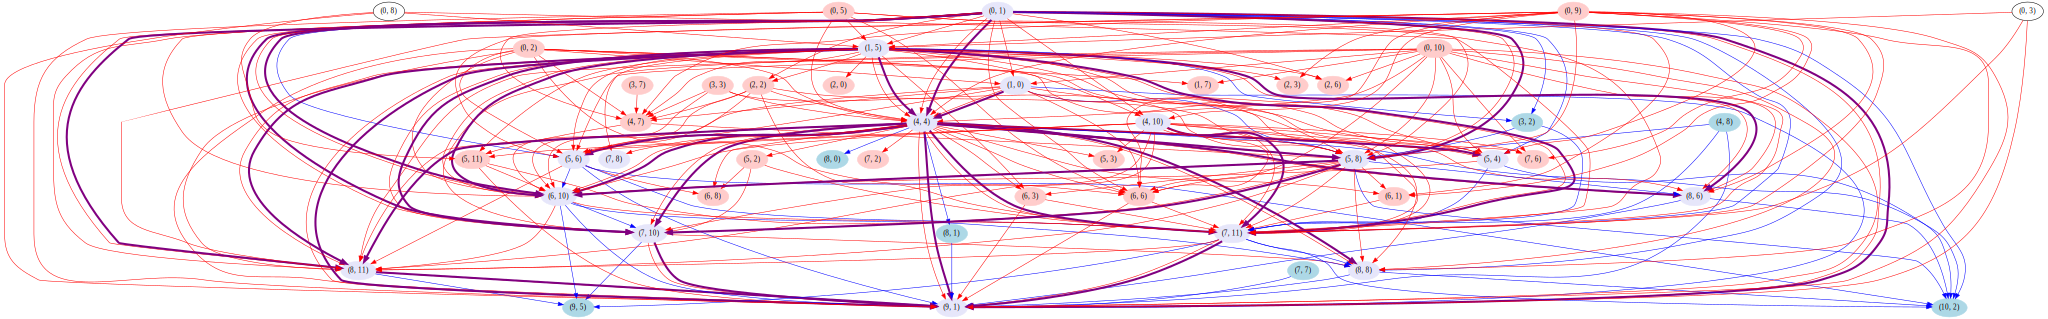

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plot_graph_adjacency(digits_adjList_copy, numwords_adjList_copy, None, filename="circuit_graph_top"+str(topperc))

# bf 97n incorr i+3

## load

In [ ]:
with open("/content/digits_adjList.pkl", "rb") as f:
  digits_adjList = pickle.load(f)

In [ ]:
with open("/content/numwords_adjList.pkl", "rb") as f:
  numwords_adjList = pickle.load(f)

## rmv a few nodes

In [ ]:
topperc=3

In [ ]:
from graphviz import Digraph, Source
from IPython.display import display
from google.colab import files

def plot_graph_adjacency(head_adjList_1, head_adjList_2, head_adjList_3=None, filename="circuit_graph"):
    dot = Digraph()

    # concat all keys from lists into one list
    # all_keys = list(head_adjList_1.keys()) + list(head_adjList_2.keys()) + list(head_adjList_3.keys())
    # setX = all_keys

    # greater_than = [(0, 1), (0, 3), (0, 5), (5, 5), (6, 1), (6, 9), (7, 10), (8, 11), (9,1)]
    # set3 = set(greater_than)

    # determine set overlap
    set1 = set(list(head_adjList_1.keys()))
    set2 = set(list(head_adjList_2.keys()))
    # set3 = set(list(head_adjList_3.keys()))
    # setX = set1.union(set2, set3)
    setX = set1.union(set2)

    color_dict = {}
    for end_node in setX:
    # for member in setX:
        in_set1 = end_node in set1
        in_set2 = end_node in set2
        # in_set1 = member in set1
        # in_set2 = member in set2
        # in_set3 = member in set3

        # if end_node == (4, 6):
        #     print(end_node)
        #     print(in_set1)
        #     print(in_set2)

        # if in_set1 and not in_set2 and not in_set3:
        if in_set1 and not in_set2:
            # color_dict[member] = "#ffcccb" #light red
            dot.node(str(end_node), color="#ffcccb", style='filled')
        # elif not in_set1 and in_set2 and not in_set3:
        elif not in_set1 and in_set2:
            # color_dict[member] = "#ADD8E6" #light blue
            dot.node(str(end_node), color="#ADD8E6", style='filled')
        # elif not in_set1 and not in_set2 and in_set3:
        #     color_dict[member] = "#FDDC5C" #light gold
        # elif in_set1 and in_set2 and not in_set3:
        elif in_set1 and in_set2:
            # color_dict[member] = "#E6E6FA" #light purple
            dot.node(str(end_node), color="#E6E6FA", style='filled')
        # elif not in_set1 and in_set2 and in_set3:
        #     color_dict[member] = "#90EE90" #light green
        # elif in_set1 and not in_set2 and in_set3:
        #     color_dict[member] = "#FFD580" #light orange
        # elif in_set1 and in_set2 and in_set3:
        #     color_dict[member] = "white"

    # for end_node in setX:
    #     endNodeColor = color_dict[end_node]
    #     if endNodeColor != 'white':
    #         dot.node(str(end_node), color=endNodeColor, style='filled')
    #     else:
    #         dot.node(str(end_node))

    edges_so_far = []
    for end_node, start_nodes_list in head_adjList_1.items():
        for start_node in start_nodes_list:
            # if (start_node, end_node) not in edges_so_far:
            dot.edge(str(start_node), str(end_node), color = 'red') #light red #ffcccb
            edges_so_far.append((start_node, end_node))
    for end_node, start_nodes_list in head_adjList_2.items():
        for start_node in start_nodes_list:
            if (start_node, end_node) not in edges_so_far:
                dot.edge(str(start_node), str(end_node), color = 'blue') #light blue #ADD8E6
                edges_so_far.append((start_node, end_node))
            else:
                dot.edge(str(start_node), str(end_node), color = 'purple', penwidth='4.0')
    # for end_node, start_nodes_list in head_adjList_3.items():
    #     if (start_node, end_node) not in edges_so_far:
    #         dot.edge(str(start_node), str(end_node), color = '#FDDC5C') #light gold
    #         edges_so_far.append((start_node, end_node))

    # Display the graph in Colab
    display(Source(dot.source))

    # Save the graph to a file
    # dot.format = 'pdf'  # You can change this to 'pdf', 'svg', etc. based on your needs
    dot.format = 'pdf'  # You can change this to 'pdf', 'svg', etc. based on your needs
    dot.render(filename)
    # files.download(filename + ".pdf")
    files.download(filename + ".pdf")

In [ ]:
digits_adjList_copy = digits_adjList.copy()
# del digits_adjList_copy[(11, 10)]
# del digits_adjList_copy[(0, 8)]
# del digits_adjList_copy[(0, 3)]
# del digits_adjList_copy[(2, 4)]
# del digits_adjList_copy[(3, 11)]
# del digits_adjList_copy[(2, 9)]

numwords_adjList_copy = numwords_adjList.copy()
# del numwords_adjList_copy[(11, 8)]
# del numwords_adjList_copy[(6, 9)]

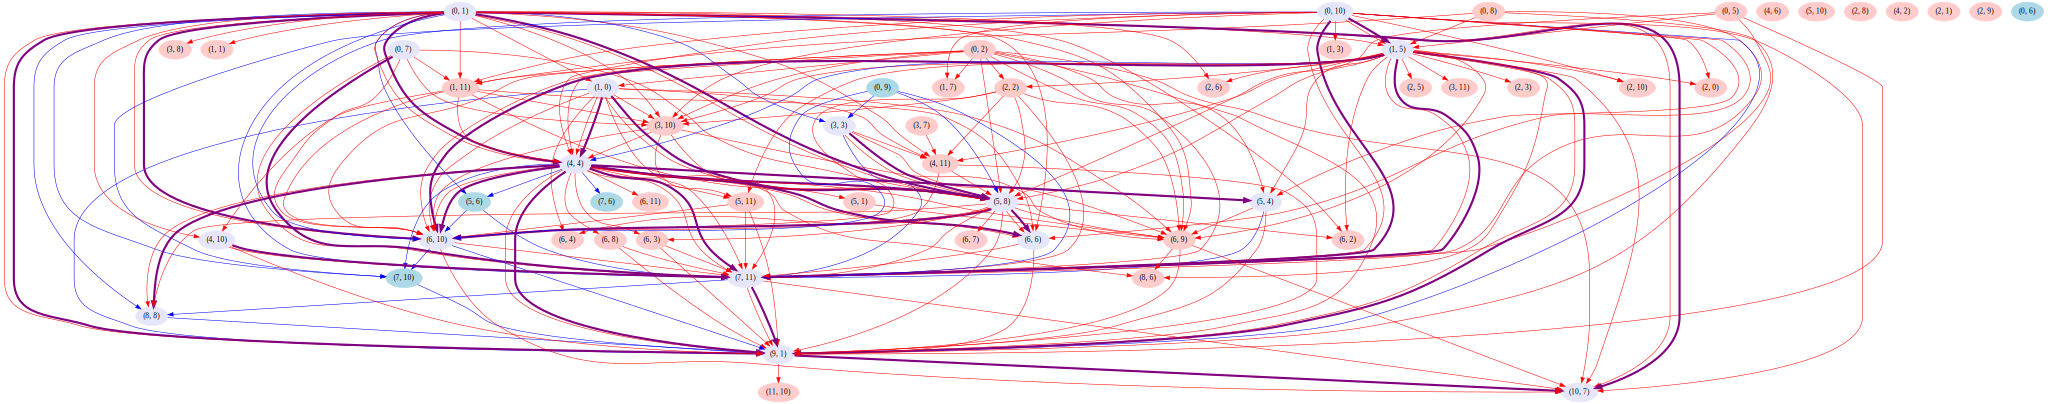

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plot_graph_adjacency(digits_adjList_copy, numwords_adjList_copy, None, filename="circuit_graph_top"+str(topperc))

# bf 80n incorr i+3

## load

In [2]:
with open("/content/digits_adjList.pkl", "rb") as f:
  digits_adjList = pickle.load(f)

In [3]:
with open("/content/numwords_adjList.pkl", "rb") as f:
  numwords_adjList = pickle.load(f)

## rmv a few nodes

In [4]:
topperc=3

In [19]:
from graphviz import Digraph, Source
from IPython.display import display
from google.colab import files

def plot_graph_adjacency(head_adjList_1, head_adjList_2, head_adjList_3=None, filename="circuit_graph"):
    dot = Digraph()

    # concat all keys from lists into one list
    # all_keys = list(head_adjList_1.keys()) + list(head_adjList_2.keys()) + list(head_adjList_3.keys())
    # setX = all_keys

    # greater_than = [(0, 1), (0, 3), (0, 5), (5, 5), (6, 1), (6, 9), (7, 10), (8, 11), (9,1)]
    # set3 = set(greater_than)

    # determine set overlap
    set1 = set(list(head_adjList_1.keys()))
    set2 = set(list(head_adjList_2.keys()))
    # set3 = set(list(head_adjList_3.keys()))
    # setX = set1.union(set2, set3)
    setX = set1.union(set2)

    color_dict = {}
    for end_node in setX:
    # for member in setX:
        in_set1 = end_node in set1
        in_set2 = end_node in set2
        # in_set1 = member in set1
        # in_set2 = member in set2
        # in_set3 = member in set3

        # if end_node == (4, 6):
        #     print(end_node)
        #     print(in_set1)
        #     print(in_set2)

        # if in_set1 and not in_set2 and not in_set3:
        if in_set1 and not in_set2:
            # color_dict[member] = "#ffcccb" #light red
            dot.node(str(end_node), color="#ffcccb", style='filled')
        # elif not in_set1 and in_set2 and not in_set3:
        elif not in_set1 and in_set2:
            # color_dict[member] = "#ADD8E6" #light blue
            dot.node(str(end_node), color="#ADD8E6", style='filled')
        # elif not in_set1 and not in_set2 and in_set3:
        #     color_dict[member] = "#FDDC5C" #light gold
        # elif in_set1 and in_set2 and not in_set3:
        elif in_set1 and in_set2:
            # color_dict[member] = "#E6E6FA" #light purple
            dot.node(str(end_node), color="#E6E6FA", style='filled')
        # elif not in_set1 and in_set2 and in_set3:
        #     color_dict[member] = "#90EE90" #light green
        # elif in_set1 and not in_set2 and in_set3:
        #     color_dict[member] = "#FFD580" #light orange
        # elif in_set1 and in_set2 and in_set3:
        #     color_dict[member] = "white"

    # for end_node in setX:
    #     endNodeColor = color_dict[end_node]
    #     if endNodeColor != 'white':
    #         dot.node(str(end_node), color=endNodeColor, style='filled')
    #     else:
    #         dot.node(str(end_node))

    adjList_1_edges = []
    adjList_2_edges = []
    for end_node, start_nodes_list in head_adjList_1.items():
        for start_node in start_nodes_list:
            # if (start_node, end_node) not in edges_so_far:
            # dot.edge(str(start_node), str(end_node), color = 'red') #light red #ffcccb
            adjList_1_edges.append((start_node, end_node))
    for end_node, start_nodes_list in head_adjList_2.items():
        for start_node in start_nodes_list:
            if (start_node, end_node) not in adjList_1_edges:
                dot.edge(str(start_node), str(end_node), color = 'blue') #light blue #ADD8E6
            adjList_2_edges.append((start_node, end_node))
            # else:
    for (start_node, end_node) in adjList_1_edges:
        if (start_node, end_node) in adjList_2_edges:
            dot.edge(str(start_node), str(end_node), color = 'purple', penwidth='4.0')
        else:
            dot.edge(str(start_node), str(end_node), color = 'red') #light red #ffcccb
    # for end_node, start_nodes_list in head_adjList_3.items():
    #     if (start_node, end_node) not in edges_so_far:
    #         dot.edge(str(start_node), str(end_node), color = '#FDDC5C') #light gold
    #         edges_so_far.append((start_node, end_node))

    # Display the graph in Colab
    display(Source(dot.source))

    # Save the graph to a file
    # dot.format = 'pdf'  # You can change this to 'pdf', 'png', etc. based on your needs
    dot.format = 'png'  # You can change this to 'pdf', 'svg', etc. based on your needs
    dot.render(filename)
    # files.download(filename + ".pdf")
    files.download(filename + ".png")

In [17]:
digits_adjList_copy = digits_adjList.copy()
del digits_adjList_copy[(3, 7)]
del digits_adjList_copy[(2, 11)]
del digits_adjList_copy[(2, 8)]
del digits_adjList_copy[(3, 9)]
del digits_adjList_copy[(2, 1)]
del digits_adjList_copy[(3, 5)]
del digits_adjList_copy[(3, 11)]
del digits_adjList_copy[(1, 1)]
del digits_adjList_copy[(2, 9)]

numwords_adjList_copy = numwords_adjList.copy()
del numwords_adjList_copy[(8, 7)]
# del numwords_adjList_copy[(6, 9)]

In [ ]:
plot_graph_adjacency(digits_adjList_copy, numwords_adjList_copy, None, filename="circuit_graph_top"+str(topperc))

In [44]:
from graphviz import Digraph, Source
from IPython.display import display
from google.colab import files

def plot_graph_adjacency(head_adjList_1, head_adjList_2, head_adjList_3=None, filename="circuit_graph"):
    dot = Digraph()
    # dot.attr(rankdir='LR', ranksep='0.5', nodesep='0.25')  # Adjust the rankdir, ranksep, and nodesep
    dot.attr(ranksep='0.45', nodesep='0.12')  # Adjust the rankdir, ranksep, and nodesep (defaults 0.75, 0.25)

    # concat all keys from lists into one list
    # all_keys = list(head_adjList_1.keys()) + list(head_adjList_2.keys()) + list(head_adjList_3.keys())
    # setX = all_keys

    # greater_than = [(0, 1), (0, 3), (0, 5), (5, 5), (6, 1), (6, 9), (7, 10), (8, 11), (9,1)]
    # set3 = set(greater_than)

    # determine set overlap
    set1 = set(list(head_adjList_1.keys()))
    set2 = set(list(head_adjList_2.keys()))
    # set3 = set(list(head_adjList_3.keys()))
    # setX = set1.union(set2, set3)
    setX = set1.union(set2)

    impt_nodes = [(1,5), (4,4), (7,11), (9,1)]

    color_dict = {}
    for end_node in setX:
    # for member in setX:
        in_set1 = end_node in set1
        in_set2 = end_node in set2
        # in_set1 = member in set1
        # in_set2 = member in set2
        # in_set3 = member in set3

        # if end_node == (4, 6):
        #     print(end_node)
        #     print(in_set1)
        #     print(in_set2)

        # if in_set1 and not in_set2 and not in_set3:
        if in_set1 and not in_set2:
            # color_dict[member] = "#ffcccb" #light red
            dot.node(str(end_node), color="#ffcccb", style='filled')
        # elif not in_set1 and in_set2 and not in_set3:
        elif not in_set1 and in_set2:
            # color_dict[member] = "#ADD8E6" #light blue
            dot.node(str(end_node), color="#ADD8E6", style='filled')
        # elif not in_set1 and not in_set2 and in_set3:
        #     color_dict[member] = "#FDDC5C" #light gold
        # elif in_set1 and in_set2 and not in_set3:
        elif in_set1 and in_set2:
            # color_dict[member] = "#E6E6FA" #light purple
            if end_node in impt_nodes:
                dot.node(str(end_node), color="#E6E6FA", style='filled')
            else:
                dot.node(str(end_node), color="#E6E6FA", style='filled')
        # elif not in_set1 and in_set2 and in_set3:
        #     color_dict[member] = "#90EE90" #light green
        # elif in_set1 and not in_set2 and in_set3:
        #     color_dict[member] = "#FFD580" #light orange
        # elif in_set1 and in_set2 and in_set3:
        #     color_dict[member] = "white"

    # for end_node in setX:
    #     endNodeColor = color_dict[end_node]
    #     if endNodeColor != 'white':
    #         dot.node(str(end_node), color=endNodeColor, style='filled')
    #     else:
    #         dot.node(str(end_node))

    adjList_1_edges = []
    adjList_2_edges = []
    for end_node, start_nodes_list in head_adjList_1.items():
        for start_node in start_nodes_list:
            # if (start_node, end_node) not in edges_so_far:
            # dot.edge(str(start_node), str(end_node), color = 'red') #light red #ffcccb
            adjList_1_edges.append((start_node, end_node))
    for end_node, start_nodes_list in head_adjList_2.items():
        for start_node in start_nodes_list:
            if (start_node, end_node) not in adjList_1_edges:
                dot.edge(str(start_node), str(end_node), color = 'blue') #light blue #ADD8E6
            adjList_2_edges.append((start_node, end_node))
            # else:
    for (start_node, end_node) in adjList_1_edges:
        if (start_node, end_node) in adjList_2_edges:
            dot.edge(str(start_node), str(end_node), color = 'purple', penwidth='4.0')
        else:
            dot.edge(str(start_node), str(end_node), color = 'red') #light red #ffcccb
    # for end_node, start_nodes_list in head_adjList_3.items():
    #     if (start_node, end_node) not in edges_so_far:
    #         dot.edge(str(start_node), str(end_node), color = '#FDDC5C') #light gold
    #         edges_so_far.append((start_node, end_node))

    # dot.attr(splines='ortho')

    # Display the graph in Colab
    display(Source(dot.source))

    # Save the graph to a file
    dot.format = 'pdf'  # You can change this to 'pdf', 'png', etc. based on your needs
    # dot.format = 'png'  # You can change this to 'pdf', 'svg', etc. based on your needs
    dot.render(filename)
    files.download(filename + ".pdf")
    # files.download(filename + ".png")

In [62]:
from graphviz import Digraph, Source
from IPython.display import display
from google.colab import files

def plot_graph_adjacency(head_adjList_1, head_adjList_2, head_adjList_3=None, filename="circuit_graph"):
    dot = Digraph()
    # dot.attr(rankdir='LR', ranksep='0.5', nodesep='0.25')  # Adjust the rankdir, ranksep, and nodesep
    dot.attr(ranksep='0.45', nodesep='0.12')  # Adjust the rankdir, ranksep, and nodesep (defaults 0.75, 0.25)

    # concat all keys from lists into one list
    # all_keys = list(head_adjList_1.keys()) + list(head_adjList_2.keys()) + list(head_adjList_3.keys())
    # setX = all_keys

    # greater_than = [(0, 1), (0, 3), (0, 5), (5, 5), (6, 1), (6, 9), (7, 10), (8, 11), (9,1)]
    # set3 = set(greater_than)

    # determine set overlap
    set1 = set(list(head_adjList_1.keys()))
    set2 = set(list(head_adjList_2.keys()))
    # set3 = set(list(head_adjList_3.keys()))
    # setX = set1.union(set2, set3)
    setX = set1.union(set2)

    impt_nodes = [(1,5), (4,4), (7,11), (9,1)]

    color_dict = {}
    for end_node in setX:
    # for member in setX:
        in_set1 = end_node in set1
        in_set2 = end_node in set2
        # in_set1 = member in set1
        # in_set2 = member in set2
        # in_set3 = member in set3

        node_name = f"{end_node[0]} , {end_node[1]}" # Change to x.y format

        # if in_set1 and not in_set2 and not in_set3:
        if in_set1 and not in_set2:
            # color_dict[member] = "#ffcccb" #light red
            dot.node(node_name, color="#ffcccb", style='filled')
        # elif not in_set1 and in_set2 and not in_set3:
        elif not in_set1 and in_set2:
            # color_dict[member] = "#ADD8E6" #light blue
            dot.node(node_name, color="#ADD8E6", style='filled')
        # elif not in_set1 and not in_set2 and in_set3:
        #     color_dict[member] = "#FDDC5C" #light gold
        # elif in_set1 and in_set2 and not in_set3:
        elif in_set1 and in_set2:
            # color_dict[member] = "#E6E6FA" #light purple
            if end_node in impt_nodes:
                dot.node(node_name, color="black", fillcolor="#DADAE4", style='filled', penwidth='2')
            else:
                dot.node(node_name, color="#E6E6FA", style='filled')
        # elif not in_set1 and in_set2 and in_set3:
        #     color_dict[member] = "#90EE90" #light green
        # elif in_set1 and not in_set2 and in_set3:
        #     color_dict[member] = "#FFD580" #light orange
        # elif in_set1 and in_set2 and in_set3:
        #     color_dict[member] = "white"

    # for end_node in setX:
    #     endNodeColor = color_dict[end_node]
    #     if endNodeColor != 'white':
    #         dot.node(str(end_node), color=endNodeColor, style='filled')
    #     else:
    #         dot.node(str(end_node))

    adjList_1_edges = []
    adjList_2_edges = []
    for end_node, start_nodes_list in head_adjList_1.items():
        for start_node in start_nodes_list:
            # if (start_node, end_node) not in edges_so_far:
            # dot.edge(str(start_node), str(end_node), color = 'red') #light red #ffcccb
            adjList_1_edges.append((start_node, end_node))
    for end_node, start_nodes_list in head_adjList_2.items():
        for start_node in start_nodes_list:
            if (start_node, end_node) not in adjList_1_edges:
                start_name = f"{start_node[0]} , {start_node[1]}"
                end_name = f"{end_node[0]} , {end_node[1]}"
                dot.edge(str(start_name), str(end_name), color = 'blue') #light blue #ADD8E6
            adjList_2_edges.append((start_node, end_node))
            # else:
    for (start_node, end_node) in adjList_1_edges:
        start_name = f"{start_node[0]} , {start_node[1]}"
        end_name = f"{end_node[0]} , {end_node[1]}"
        if (start_node, end_node) in adjList_2_edges:
            dot.edge(str(start_name), str(end_name), color = 'purple', penwidth='4.0')
        else:
            dot.edge(str(start_name), str(end_name), color = 'red') #light red #ffcccb
    # for end_node, start_nodes_list in head_adjList_3.items():
    #     if (start_node, end_node) not in edges_so_far:
    #         dot.edge(str(start_node), str(end_node), color = '#FDDC5C') #light gold
    #         edges_so_far.append((start_node, end_node))

    # dot.attr(splines='ortho')

    # Display the graph in Colab
    display(Source(dot.source))

    # Save the graph to a file
    dot.format = 'pdf'  # You can change this to 'pdf', 'png', etc. based on your needs
    # dot.format = 'png'  # You can change this to 'pdf', 'svg', etc. based on your needs
    dot.render(filename)
    files.download(filename + ".pdf")
    # files.download(filename + ".png")

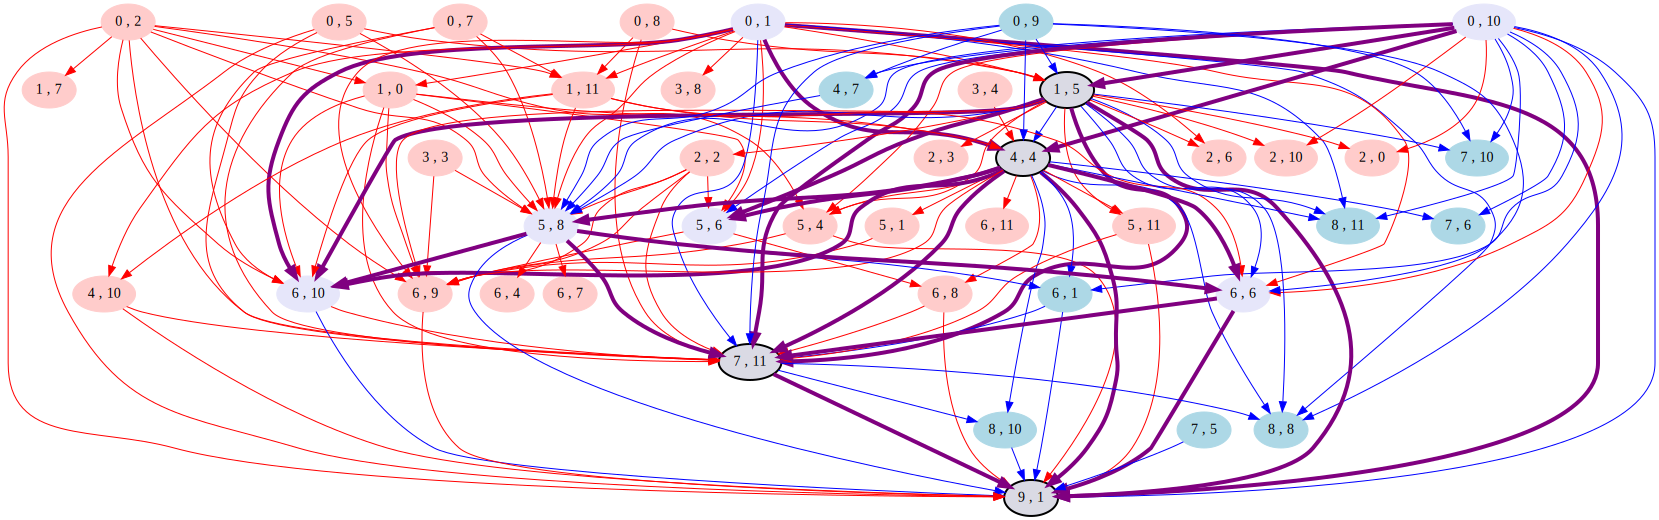

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
plot_graph_adjacency(digits_adjList_copy, numwords_adjList_copy, None, filename="circuit_graph_top"+str(topperc))